# SIMBA: multiomics data co-embedding (cells, genes, and peaks)

- Last updated: 11/27/2023
- Author: Yang-Joon Kim

Description: SIMBA (from Luca Pinello's lab) uses network graph theory to compute the edges bewteen nodes (cells, genes, or peaks), which enables co-embedding of cells, genes, with peaks (and even TF motifs or k-mers). This can help our annotation of different cell-types, as well as marker genes/peaks for our single-cell multiome datasets from zebrafish.

sample notebook: https://simba-bio.readthedocs.io/en/latest/multiome_shareseq.html

**Specific goals:**
- run SIMBA tutorial with our single-cell multiome datasets (zebrafish, 15-somites stage, TDR119)
- exploratory analyses on marker genes, peaks, using the cell-type annotations transferred from zebrahub.



In [1]:
import os
import simba as si
import scanpy as sc
import pandas as pd
import numpy as np

si.__version__

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.2'

In [2]:
workdir = '/hpc/projects/data.science/yangjoon.kim/multiome_data_viz_simba/'
si.settings.set_workdir(workdir)

Saving results in: /hpc/projects/data.science/yangjoon.kim/multiome_data_viz_simba/


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
# to make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_3242270/3381039072.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [5]:
dict_adata = si.datasets.multiome_ma2020_fig4()

multiome_ma2020_fig4_rna.h5ad: 43.7MB [00:01, 23.5MB/s]                              


Downloaded to /hpc/projects/data.science/yangjoon.kim/multiome_data_viz_simba/data.


multiome_ma2020_fig4_atac.h5ad: 287MB [00:03, 86.7MB/s]                               


Downloaded to /hpc/projects/data.science/yangjoon.kim/multiome_data_viz_simba/data.


In [6]:
dict_adata

{'rna': AnnData object with n_obs × n_vars = 6436 × 20331
     obs: 'celltype',
 'atac': AnnData object with n_obs × n_vars = 6436 × 344592
     obs: 'depth', 'FRIP', 'TSSportion', 'EnhancerPortion', 'atac.barcode', 'rna.barcode', 'atac.umap1', 'atac.umap2', 'celltype', 'rna.umap1', 'rna.umap2'
     var: 'chr', 'start', 'end', 'width', 'strand', 'TSSidx', 'Enhanceridx', 'Gene', 'peaks'}

In [7]:
adata_CP = dict_adata['atac']
adata_CG = dict_adata['rna']

In [8]:
adata_CP

AnnData object with n_obs × n_vars = 6436 × 344592
    obs: 'depth', 'FRIP', 'TSSportion', 'EnhancerPortion', 'atac.barcode', 'rna.barcode', 'atac.umap1', 'atac.umap2', 'celltype', 'rna.umap1', 'rna.umap2'
    var: 'chr', 'start', 'end', 'width', 'strand', 'TSSidx', 'Enhanceridx', 'Gene', 'peaks'

In [9]:
adata_CG

AnnData object with n_obs × n_vars = 6436 × 20331
    obs: 'celltype'

## Step 1. scATAC-seq
### preprocessing

In [11]:
si.pp.filter_peaks(adata_CP, min_n_cells=3)

si.pp.cal_qc_atac(adata_CP)

Before filtering: 
6436 cells, 344592 peaks
Filter peaks based on min_n_cells
After filtering out low-expressed peaks: 
6436 cells, 332987 peaks


/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

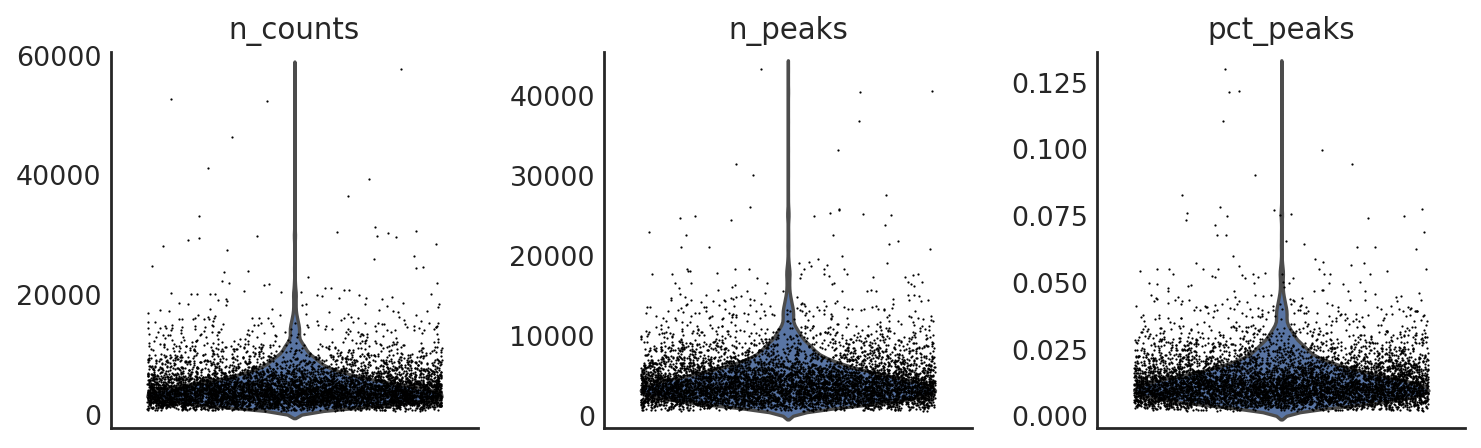

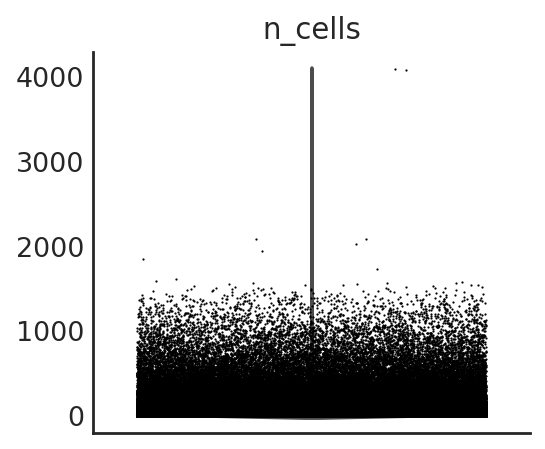

In [12]:
si.pl.violin(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], list_var=['n_cells'])

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

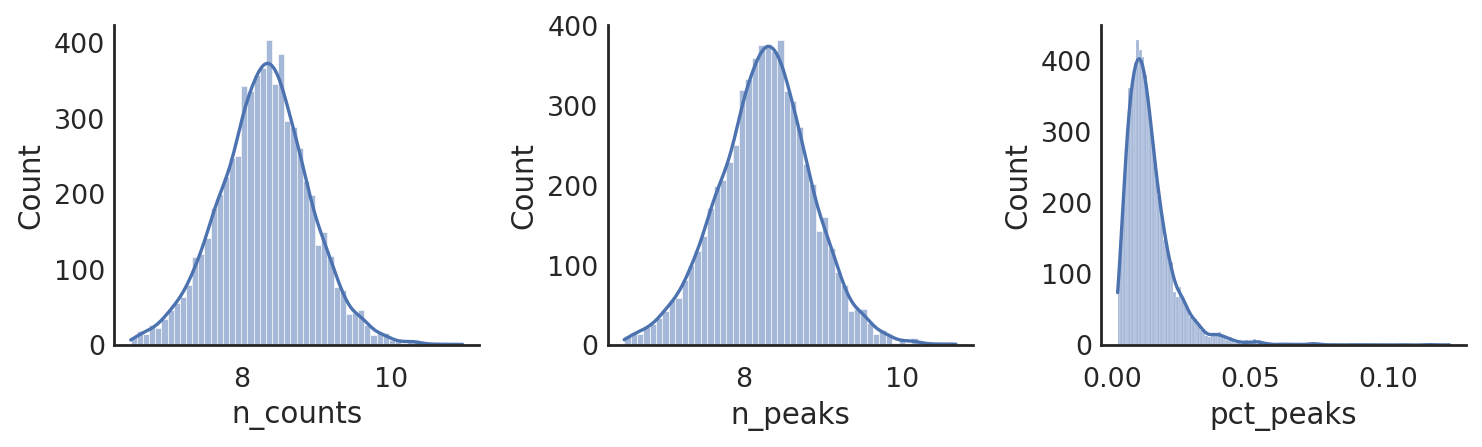

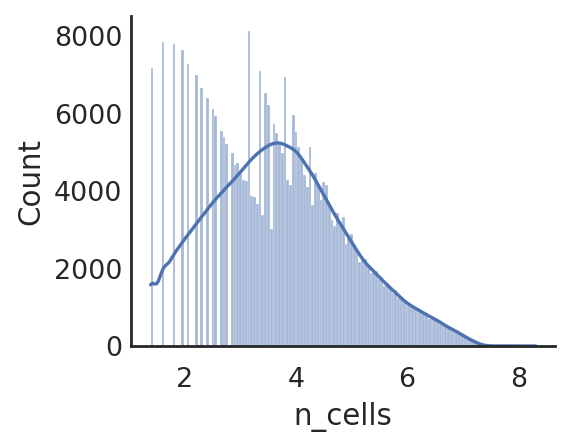

In [13]:
si.pl.hist(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], log=True, list_var=['n_cells'])

In [ ]:
# select peaks (optional): This will speed up the training process by only keeping peaks associated with top PCs.
si.pp.pca(adata_CP, n_components=40)
si.pl.pca_variance_ratio(adata_CP)
si.pp.select_pcs_features(adata_CP)

## Step 2. scRNA-seq
## Step 2-1. preproecssing


In [14]:
si.pp.filter_genes(adata_CG,min_n_cells=3)
si.pp.cal_qc_rna(adata_CG)
si.pp.normalize(adata_CG,method='lib_size')
si.pp.log_transform(adata_CG)

Before filtering: 
6436 cells, 20331 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
6436 cells, 17399 genes


2000 variable genes are selected.


/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/simba/plotting/_plot.py:550: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(means[i], variances_norm[i], genes[i],


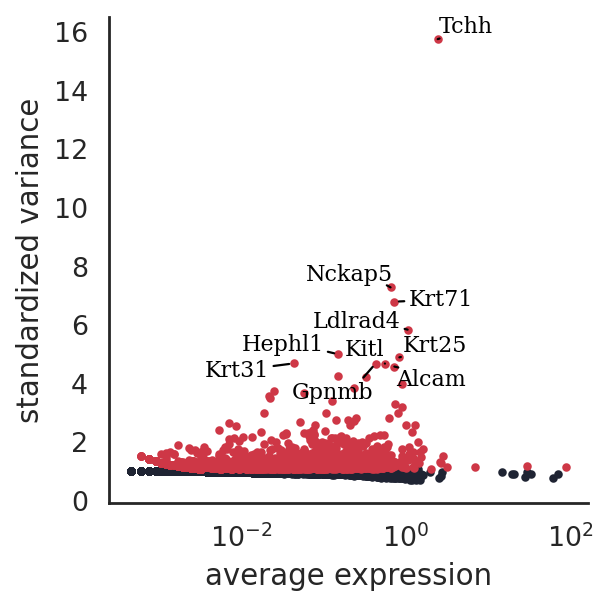

In [15]:
si.pp.select_variable_genes(adata_CG)
si.pl.variable_genes(adata_CG,show_texts=True)

In [17]:
si.tl.discretize(adata_CG, n_bins=5)

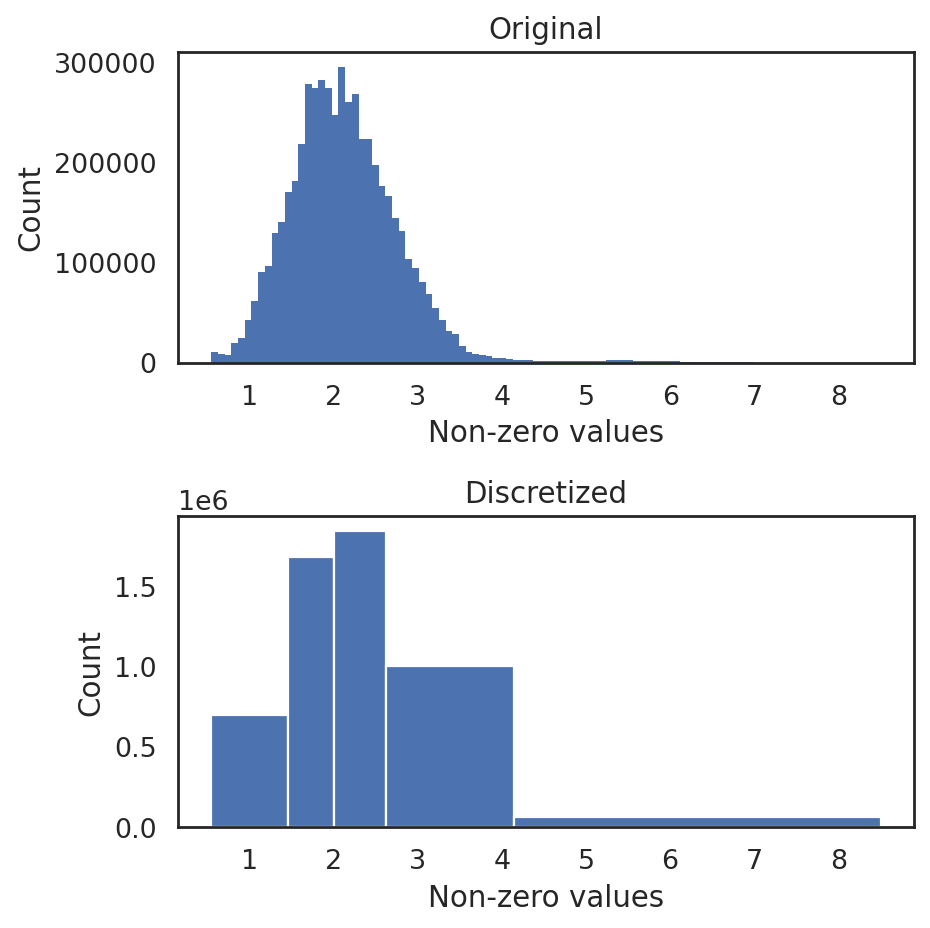

In [18]:
si.pl.discretize(adata_CG, kde=False)

## Step 3. generate graph

In [19]:
si.tl.gen_graph(list_CP=[adata_CP],
                list_CG=[adata_CG],
                copy=False,
                use_highly_variable=False,
                use_top_pcs=False,
                dirname="graph0")

`simba` does not exist in anndata 0 in `list_CP`.`.X` is being used instead.
relation0: source: C, destination: P
#edges: 29715636
relation1: source: C, destination: G
#edges: 694558
relation2: source: C, destination: G
#edges: 1679737
relation3: source: C, destination: G
#edges: 1843554
relation4: source: C, destination: G
#edges: 999689
relation5: source: C, destination: G
#edges: 63904
Total number of edges: 34997078
Writing graph file "pbg_graph.txt" to "/hpc/projects/data.science/yangjoon.kim/multiome_data_viz_simba/pbg/graph0" ...
Finished.


## Step 4. PBG training

Before PBG trainig, let's take a look at the parameters:

In [20]:
si.settings.pbg_params

{'entity_path': '/hpc/projects/data.science/yangjoon.kim/multiome_data_viz_simba/pbg/graph0/input/entity',
 'edge_paths': ['/hpc/projects/data.science/yangjoon.kim/multiome_data_viz_simba/pbg/graph0/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1},
  'G': {'num_partitions': 1},
  'P': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'P',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 1.0},
  {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r5', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0}],
 'dynamic_relations': False,
 'dimension': 50,
 'global_emb': False,
 'comparator': 'dot',
 'num_epochs': 10,
 'workers': 4,
 'num_batch_negs': 50,
 'num_uniform_negs': 50,

In [21]:
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')

Auto-estimating weight decay ...
`.settings.pbg_params['wd']` has been updated to 0.001013
Weight decay being used for training is 0.001013
Converting input data ...
[2023-11-26 23:37:00.275361] Using the 6 relation types given in the config
[2023-11-26 23:37:00.275793] Searching for the entities in the edge files...
[2023-11-26 23:37:39.254645] Entity type C:
[2023-11-26 23:37:39.255438] - Found 6436 entities
[2023-11-26 23:37:39.255894] - Removing the ones with fewer than 1 occurrences...
[2023-11-26 23:37:39.257137] - Left with 6436 entities
[2023-11-26 23:37:39.257463] - Shuffling them...
[2023-11-26 23:37:39.260639] Entity type G:
[2023-11-26 23:37:39.261245] - Found 17399 entities
[2023-11-26 23:37:39.261699] - Removing the ones with fewer than 1 occurrences...
[2023-11-26 23:37:39.263391] - Left with 17399 entities
[2023-11-26 23:37:39.263656] - Shuffling them...
[2023-11-26 23:37:39.271506] Entity type P:
[2023-11-26 23:37:39.272085] - Found 332987 entities
[2023-11-26 23:37:39

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/torchbiggraph/tensorlist.py:86: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if data.numel() == 0 and data.storage().size() == 0:
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/torchbiggraph/tensorlist.py:87: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage = data.storage()
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/torchbiggraph/tensorlist.py:88: UserWarning: TypedStorage is deprecated

[2023-11-26 23:40:28.923307] - Processed 34997078 edges in total
Starting training ...


/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/torchbiggraph/util.py:211: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  storage_type = dummy_tensor.storage_type()
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/torch/storage.py:959: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  if self.device.type not in ['cpu', 'cuda']:
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/torch/storage.py:962: UserWarning: TypedStorage is deprecated. It will be rem

Finished


Here we show how to adjust training-related parameters if needed. In general, weight decay wd is the only parameter that might need to be adjusted based on the following pbg metric plots. However, in almost all the cases, the automatically decided wd (enabling it by setting auto_wd=True) works well.

E.g. we want to change the number of cpus workers:

In [ ]:
# # modify parameters
# dict_config = si.settings.pbg_params.copy()
# # dict_config['wd'] = 0.000172
# dict_config['workers'] = 8

# ## start training
# si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model')

If wd is specified by users instead of being automatically decided, then make sure to update it in simba setting:

In [ ]:
# si.settings.pbg_params = dict_config.copy()

## Step 5. Load the PBG training result



In [22]:
# load in graph ('graph0') info
si.load_graph_stats()
# load in model info for ('graph0')
si.load_pbg_config()

In [ ]:
# # or, users can specify different paths
# # load in graph ('graph0') info
# si.load_graph_stats(path='./result_multiome_shareseq/pbg/graph0/')
# # load in model info for ('graph0')
# si.load_pbg_config(path='./result_multiome_shareseq/pbg/graph0/model/')

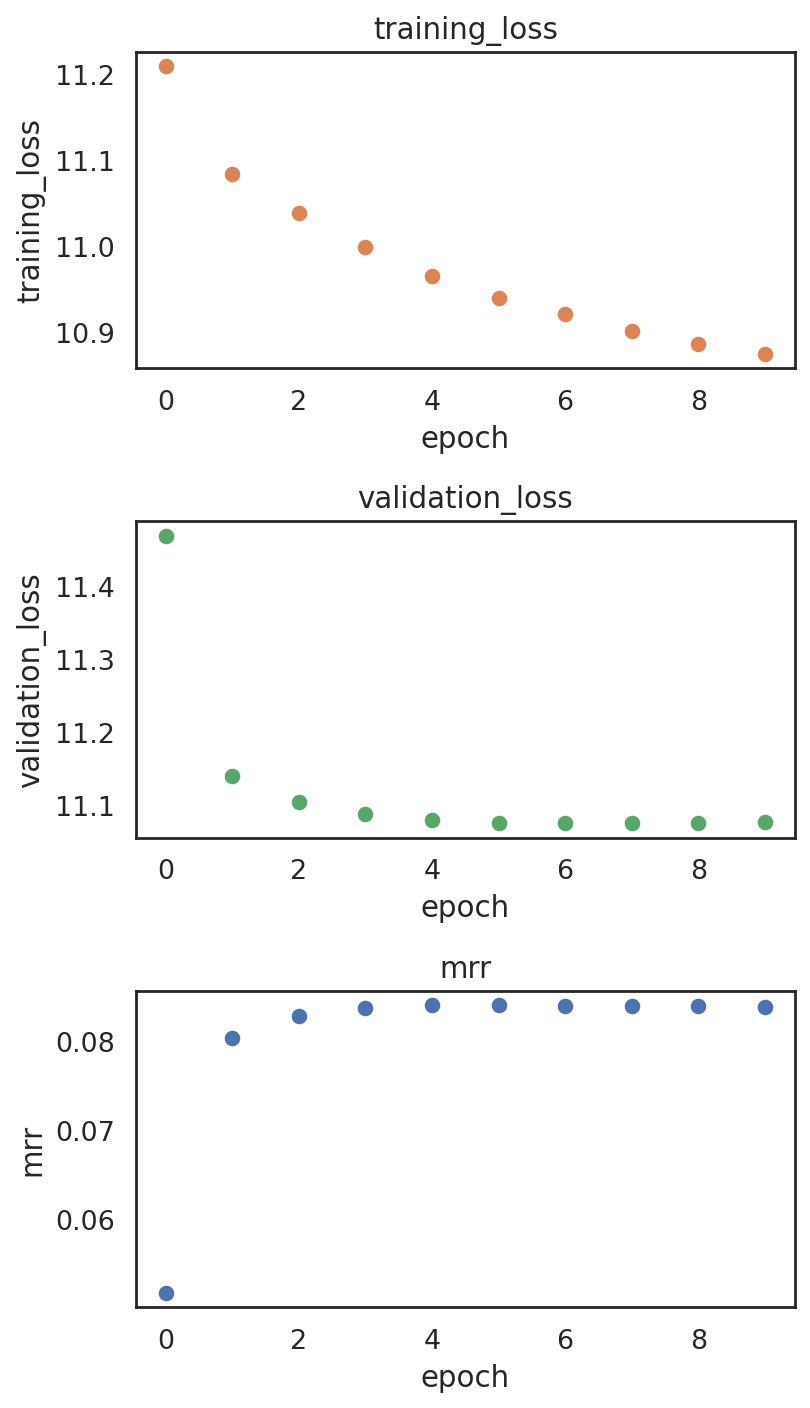

In [23]:
#Plotting training metrics to make sure the model is not overfitting
si.pl.pbg_metrics(fig_ncol=1)

## Step 6. post-training analysis

In [24]:
# extract the master dictionary for all adata objects
dict_adata = si.read_embedding()
dict_adata

{'G': AnnData object with n_obs × n_vars = 17399 × 50,
 'P': AnnData object with n_obs × n_vars = 332987 × 50,
 'C': AnnData object with n_obs × n_vars = 6436 × 50}

In [25]:
# extract embeddings for each modality (feature - cells, genes, or peaks)
adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes
adata_P = dict_adata['P']  # embeddings for peaks
# adata_K = dict_adata['K']  # embeddings for kmers
# adata_M = dict_adata['M']  # embeddings for motifs

# #### to distinguish TF motif names from gene names in this case
# adata_M.obs.index = 'M_'+adata_M.obs.index

In [26]:
# compute 2D embeddings (UMAPs) for each modality (cells, genes, or peaks)
# first, computing UMAP for "cells" (this is the normal UMAP from scRNA-seq)
si.tl.umap(adata_C, n_neighbors=15, n_components=2)

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [27]:
adata_CG

AnnData object with n_obs × n_vars = 6436 × 17399
    obs: 'celltype', 'n_counts', 'n_genes', 'pct_genes', 'pct_mt', 'pbg_id'
    var: 'n_counts', 'n_cells', 'pct_cells', 'variances_norm', 'variances', 'means', 'highly_variable', 'pbg_id'
    uns: 'disc'
    layers: 'raw', 'simba'

In [28]:
adata_C.obs["celltype"] = adata_CG[adata_C.obs_names,:].obs["celltype"].copy()
adata_C

AnnData object with n_obs × n_vars = 6436 × 50
    obs: 'celltype'
    obsm: 'X_umap'

In [33]:
palette_celltype={'TAC-1':'#F8D856', 'TAC-2':'#F1B044', 'IRS':'#C37777',
              'Medulla':'#897a74','Hair Shaft-cuticle.cortex':"#d6a780"}

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


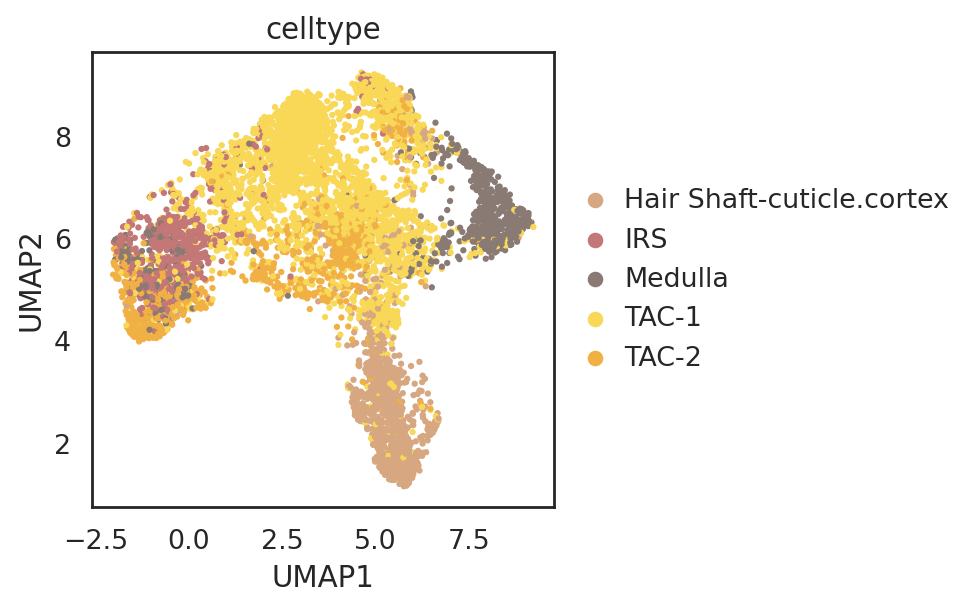

In [37]:
# cell embedding (what is this actually?! a typical UMAP from transcriptomics?)
si.pl.umap(adata_C,
           color=['celltype'], 
           dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')

### Step 6-2 visualize embeddings of cells and genes


In [30]:
adata_all_CG = si.tl.embed(adata_ref=adata_C,
                           list_adata_query=[adata_G])

Performing softmax transformation for query data 0;


In [31]:
## add annotations of all entities
adata_all_CG.obs['entity_anno'] = ""
adata_all_CG.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'

adata_all_CG.obs.head()

,celltype,id_dataset,entity_anno
Trial60.skin.R1.85.R2.40.R3.90.P1.55,TAC-2,ref,TAC-2
Trial60.skin.R1.29.R2.19.R3.28.P1.55,IRS,ref,IRS
Trial60.skin.R1.88.R2.18.R3.44.P1.54,TAC-2,ref,TAC-2
Trial60.skin.R1.59.R2.44.R3.31.P1.55,TAC-1,ref,TAC-1
Trial60.skin.R1.80.R2.15.R3.95.P1.54,TAC-2,ref,TAC-2


In [32]:
si.tl.umap(adata_all_CG,n_neighbors=15,n_components=2)

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [38]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

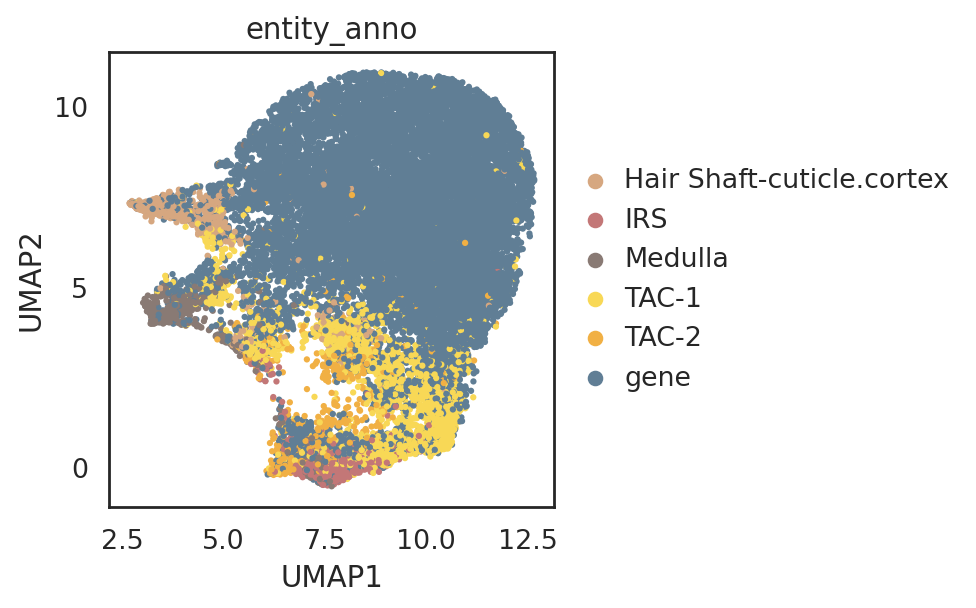

In [39]:
# plotting the cells+genes UMAP
si.pl.umap(adata_all_CG,
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(6,4),
           drawing_order='random')

In [40]:
adata_all_CG

AnnData object with n_obs × n_vars = 23835 × 50
    obs: 'celltype', 'id_dataset', 'entity_anno'
    uns: 'color'
    obsm: 'X_umap'

In [41]:
#some marker genes from the original study
marker_genes = ['Wnt3','Top2a','Shh','Krt27','Foxq1', 'Krt31','Krt71', 'Lef1', 'Hoxc13']

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

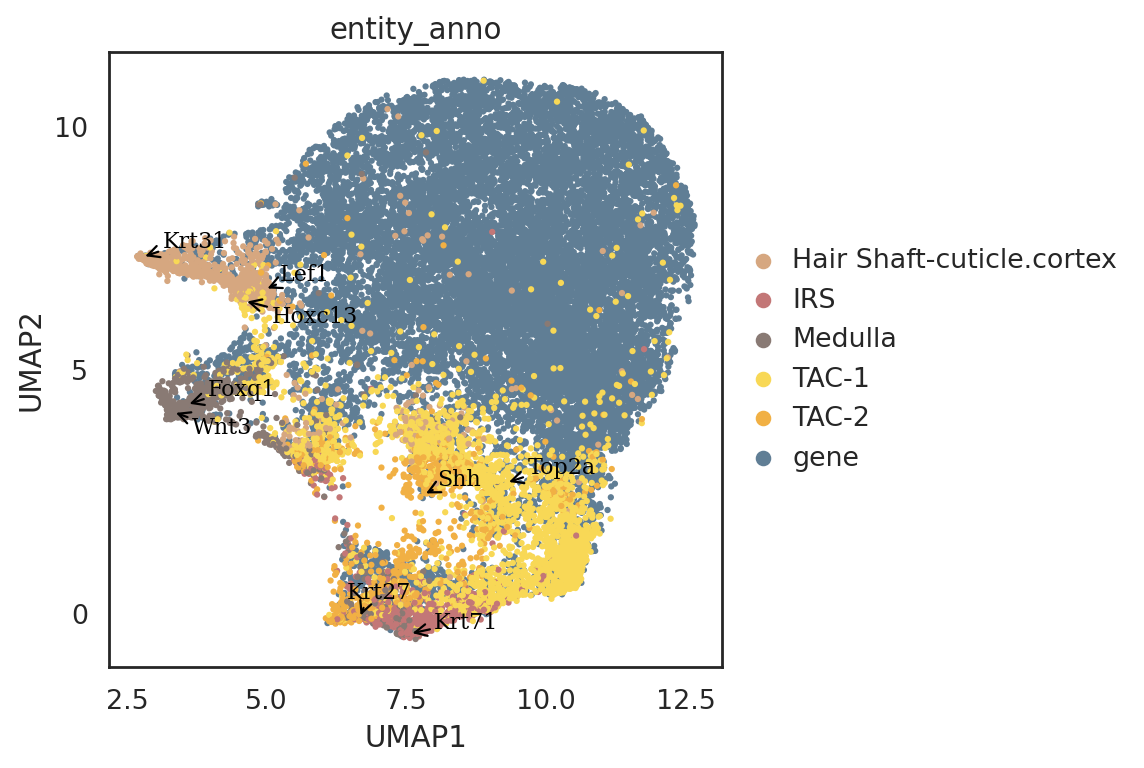

In [42]:
si.pl.umap(adata_all_CG[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(7,5),
           texts=marker_genes,
           text_expand=(2,1.5),
           show_texts=True,
           drawing_order='original')

### Step 6-3. visualize embeddings of all entities including cells, genes, and peaks

In [43]:
adata_all = si.tl.embed(adata_ref=adata_C,
                        list_adata_query=[adata_G, adata_P])

Performing softmax transformation for query data 0;
Performing softmax transformation for query data 1;


In [44]:
## add annotations of all entities
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'
adata_all.obs.loc[adata_P.obs_names, 'entity_anno'] = 'peak'
# adata_all.obs.loc[adata_K.obs_names, 'entity_anno'] = 'kmer'
# adata_all.obs.loc[adata_M.obs_names, 'entity_anno'] = 'motif'

adata_all.obs.head()

,celltype,id_dataset,entity_anno
Trial60.skin.R1.85.R2.40.R3.90.P1.55,TAC-2,ref,TAC-2
Trial60.skin.R1.29.R2.19.R3.28.P1.55,IRS,ref,IRS
Trial60.skin.R1.88.R2.18.R3.44.P1.54,TAC-2,ref,TAC-2
Trial60.skin.R1.59.R2.44.R3.31.P1.55,TAC-1,ref,TAC-1
Trial60.skin.R1.80.R2.15.R3.95.P1.54,TAC-2,ref,TAC-2


In [45]:
si.tl.umap(adata_all,n_neighbors=50,n_components=2,n_jobs=8)

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value 8 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [47]:
palette_entity_anno['peak'] = "#e5c2c8"

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/simba/plotting/_plot.py:1065: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['color'] = dict()
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

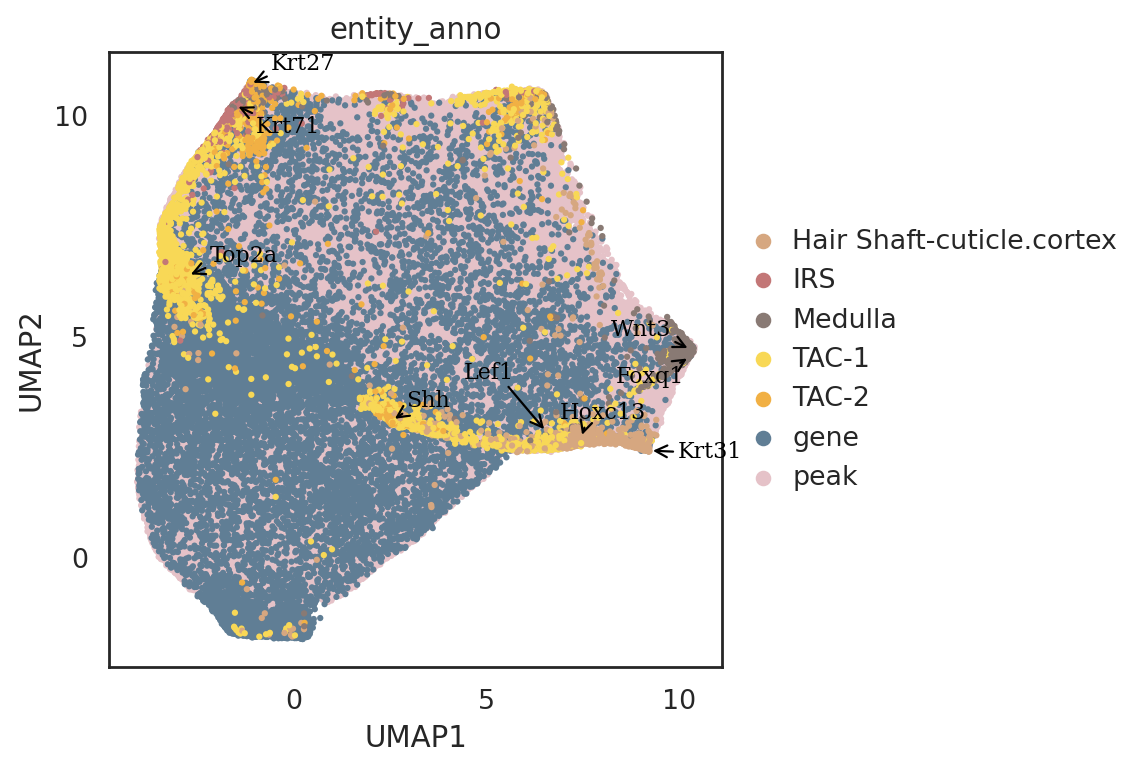

In [48]:
si.pl.umap(adata_all[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(7,5),
           drawing_order='original',
           texts=marker_genes,
           text_expand=(2,2),
           show_texts=True)

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/simba/plotting/_plot.py:1065: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['color'] = dict()
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

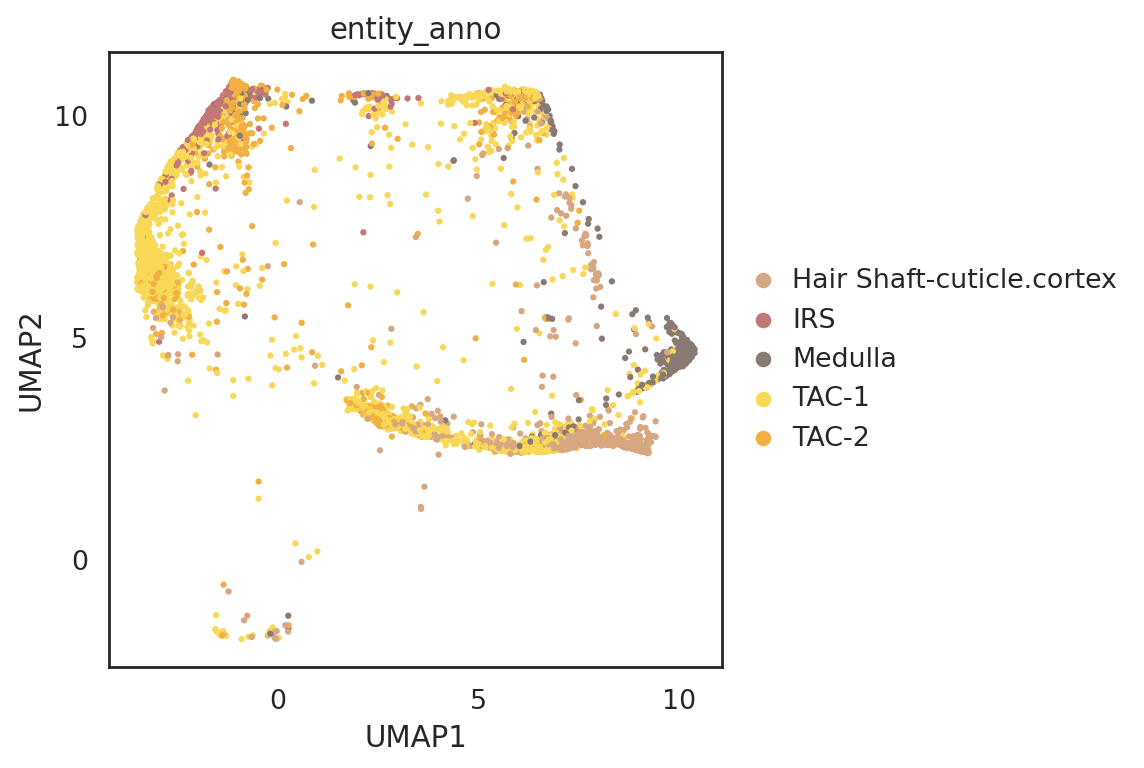

In [50]:
# only cells are shown
si.pl.umap(adata_all[adata_C.obs_names,:],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(7,5),
           drawing_order='original',
           #texts=marker_genes,
           text_expand=(2,2),
           show_texts=True)

### SIMBA metrics (what is this??)

In [51]:
# genes
adata_cmp_CG = si.tl.compare_entities(adata_ref=adata_C,
                                      adata_query=adata_G)

# peaks
adata_cmp_CP = si.tl.compare_entities(adata_ref=adata_C,
                                      adata_query=adata_P)

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

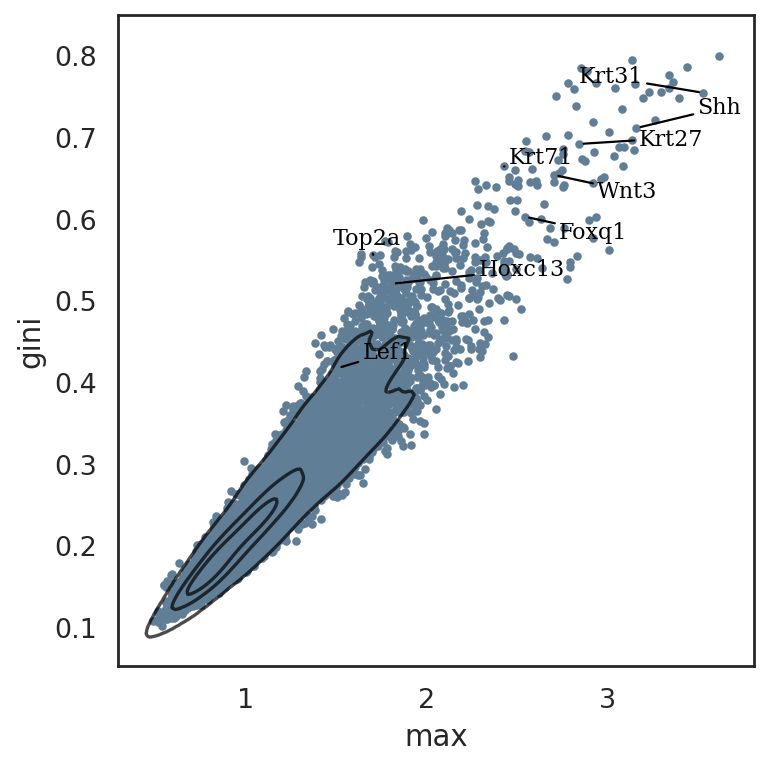

In [52]:
# plot the entityr metrics (cells and genes)
si.pl.entity_metrics(adata_cmp_CG,
                     x='max',
                     y='gini',
                     show_texts=True,
                     show_cutoff=False,
                     show_contour=True,
                     c='#607e95',
                     texts=marker_genes,
                     text_expand=(2,1.5))

In [54]:
adata_cmp_CG.var

,max,std,gini,entropy
4930509G22Rik,0.684458,0.239293,0.135908,8.739963
Avpr1a,0.738407,0.237898,0.135603,8.739735
Prmt10,1.136527,0.447095,0.248456,8.669086
1700029J03Rik,0.843462,0.339011,0.190799,8.711942
Zdhhc18,1.438163,0.537327,0.304684,8.613270
...,...,...,...,...
Cntnap5b,1.598190,0.633677,0.349637,8.561910
Dscam,1.238084,0.465806,0.264458,8.653965
Asah2,1.409731,0.524282,0.302590,8.615889
Svip,1.294940,0.577893,0.323827,8.600020


In [55]:
df_CG = adata_cmp_CG.var
df_CG

,max,std,gini,entropy
4930509G22Rik,0.684458,0.239293,0.135908,8.739963
Avpr1a,0.738407,0.237898,0.135603,8.739735
Prmt10,1.136527,0.447095,0.248456,8.669086
1700029J03Rik,0.843462,0.339011,0.190799,8.711942
Zdhhc18,1.438163,0.537327,0.304684,8.613270
...,...,...,...,...
Cntnap5b,1.598190,0.633677,0.349637,8.561910
Dscam,1.238084,0.465806,0.264458,8.653965
Asah2,1.409731,0.524282,0.302590,8.615889
Svip,1.294940,0.577893,0.323827,8.600020


In [56]:
df_CG_sorted = df_CG.sort_values("max", ascending=False)
df_CG_sorted.head(20)

,max,std,gini,entropy
Krt72,3.615658,1.330608,0.800174,6.969426
Krt31,3.529623,1.128658,0.754624,7.168746
Crym,3.441746,1.303422,0.786356,7.164944
Gm11571,3.394342,1.117095,0.747976,7.250547
Prr9,3.359183,1.335040,0.768459,7.283716
Hephl1,3.340793,1.230374,0.775940,7.219776
Scube1,3.340597,1.286559,0.760125,7.303378
Tgm6,3.297877,1.227013,0.755381,7.332075
Slc24a4,3.260229,1.112004,0.721675,7.424411
Tchhl1,3.229906,1.187374,0.756098,7.324471


In [ ]:
# plot the entityr metrics (cells and peaks) - NOTE that this is not helpful unless we annotate the peaks to "genes" using TSS
# we can actually do this using the cicero/celloracle result - annotating only the peaks associated with genes (TSS)

# si.pl.entity_metrics(adata_cmp_CP,
#                      x='max',
#                      y='gini',
#                      show_texts=True,
#                      show_cutoff=False,
#                      show_contour=False,
#                      texts=['Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)',
#                             'Peak1(Hoxc13)', 'Peak2(Hoxc13)'],
#                      text_expand=(2,1.5),
#                      c='#e5c2c8')

## Step 7. only visulize the embeddings of cells and cell-type specific features

In [108]:
# marker genes from zebrahub (15somites - from Merlin)
list_marker_genes_15somites = ["lrrc17", "comp", "ripply1", # somite
"rx1","vsx2", # optic vesicle
"tbx16","myf5","hes6", # paraxial_mesoderm
"crestin","ednrab","dlx2a", # neural_crest
"fezf1","sox1b","foxg1a", # telencephalon
"cldni","cfl1l", # periderm
"olig3","hoxd4a","rxrga", # spinal_cord_neural_tube
"gata5","myh7","tnnt2a", # heart
"pkd1b","scg3", # neural_tube
"etv5a","pitx3", # lens_placode
"elavl3","stmn1b","sncb", # trigeminal_placode
"myog","myl1","jam2a", # myotome
"prrx1","nid1b", # head_mesenchyme
"cpox","gata1a","hbbe1", # hematopoetic_system
"unc45b","ttn1","apobec2a", # adaxial_cell
"foxi3b","atp1b1b", # ectoderm_cell
"fli1b","kdrl", # lateral_mesoderm
"anxa4","cldnc","cldn15a", # pronephros
"tbx3b","loxl5b","emilin3a", # notochord
"sema3aa","irx7","vegfaa", # brain
"ppl","krt17","icn2", # periderm
"osr1","hand2", # lateral_mesoderm
"shha","shhb","foxa2", # floor_plate
"cebpa","spi1b","myb", # myeloid_progenitor
"ctslb","surf4l","sec61a1l", # hatching_gland
"mcf2lb","bricd5", #optic_placode
"etnk1","chd17","acy3"] #pronephros

In [143]:
list_marker_genes_15somites = [gene for gene in list_marker_genes_15somites if gene not in missing_genes_from_RNA]

In [112]:
len(list_marker_genes_15somites)

74

In [123]:
"hes6" in gene_selected

True

In [166]:
genes_filtered = adata_cmp_CG.var[(adata_cmp_CG.var['max']>2) & (adata_cmp_CG.var['gini']>0.4)].index.tolist()
genes_selected = list(set(genes_filtered) | set(list_marker_genes_15somites) | set(marker_genes))
len(genes_selected)

3396

In [167]:
# NOTE: The five genes were missing from our adata_all - likely because they were expressed at a very low level in our scRNA-seq dataset.
missing_genes_from_RNA = ['prrx1', 'hbbe1', 'chd17', 'ttn1', 'acy3']

genes_selected = [gene for gene in genes_selected if gene not in missing_genes_from_RNA]
len(genes_selected)

3396

In [ ]:
# # The union of top 1000 neighbor peaks of all marker genes and TF motifs
# query_result = si.tl.query(adata_all,
#                            obsm=None,
#                            entity=marker_genes + ['TF_Lef1','TF_Hoxc13'],
#                            k=1000,use_radius=False,
#                            anno_filter='entity_anno',
#                            filters=['peak'])
# print(query_result.shape)
# query_result.head()
# peaks_selected = list(query_result.index.unique())
# len(peaks_selected)

In [168]:
adata_all_selected = adata_all[adata_C.obs_names.to_list()
                               + genes_selected, ].copy()
                               #+ motifs_selected
                               #+ peaks_selected, ].copy()
adata_all_selected

AnnData object with n_obs × n_vars = 16418 × 50
    obs: 'celltype', 'id_dataset', 'entity_anno'
    obsm: 'X_umap'

In [171]:
si.tl.umap(adata_all_selected,n_neighbors=50,n_components=2, random_state=0)

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [90]:
#some marker genes from the zebrafish study
marker_genes = ["sox2","meox1","msgn1",'tbxta','tbx16','pax6a', 'pax6b', 'myl1']

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/simba/plotting/_plot.py:1065: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['color'] = dict()


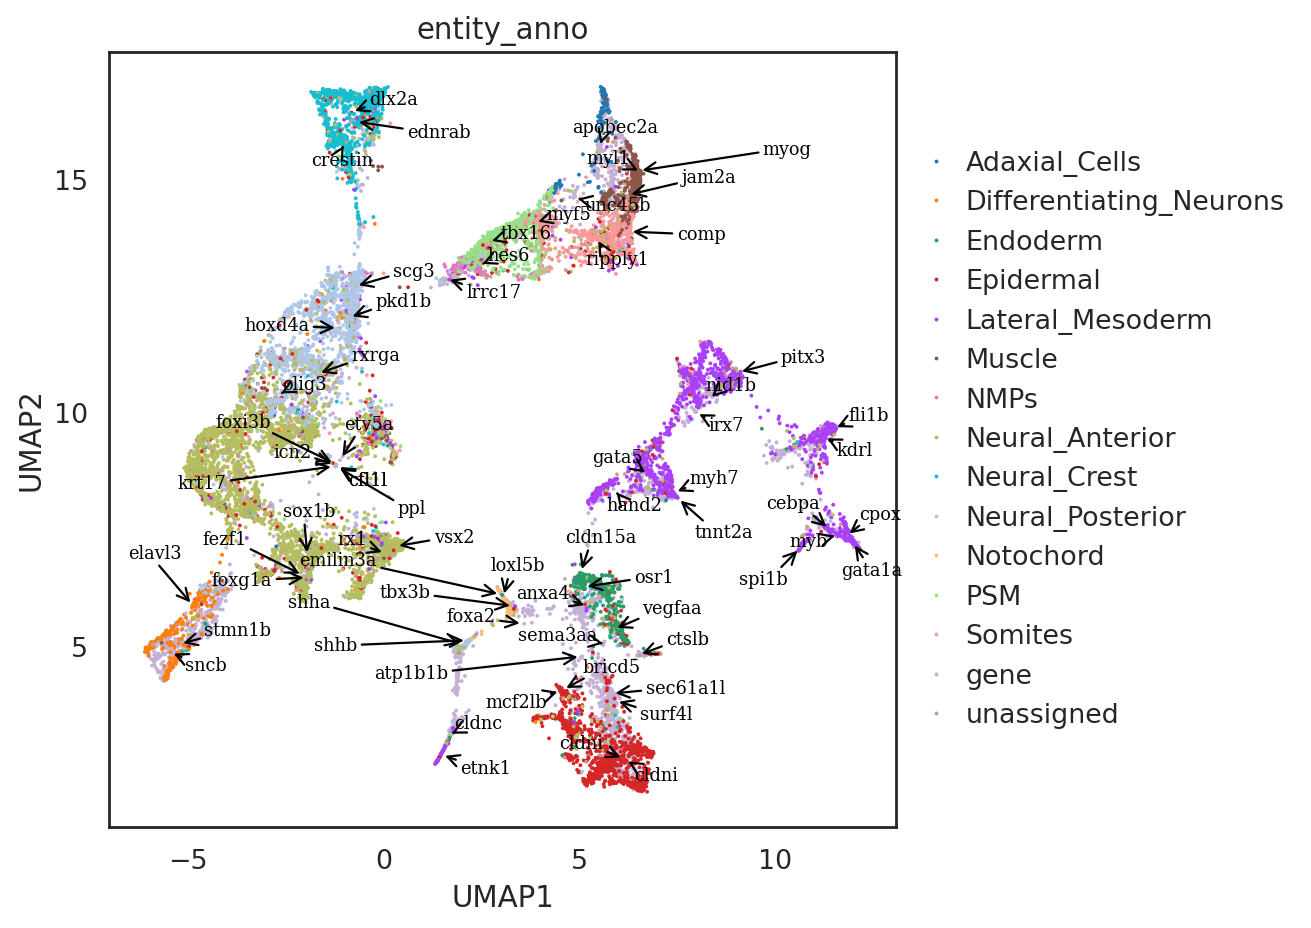

In [173]:
si.pl.umap(adata_all_selected[::-1,],
           color=['entity_anno'],
           #dict_palette={'entity_anno': palette_entity_anno},
           text_size=8,
           fig_size=(8,6),
           size=3,
           drawing_order='original',
           texts=list_marker_genes_15somites,
           #texts=marker_genes \
           #      + ['TF_Lef1','TF_Hoxc13'] \
           #      + ['Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)',
           #         'Peak1(Hoxc13)', 'Peak2(Hoxc13)'],
           text_expand=(2,1.5),
           show_texts=True)

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/simba/plotting/_plot.py:1065: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['color'] = dict()


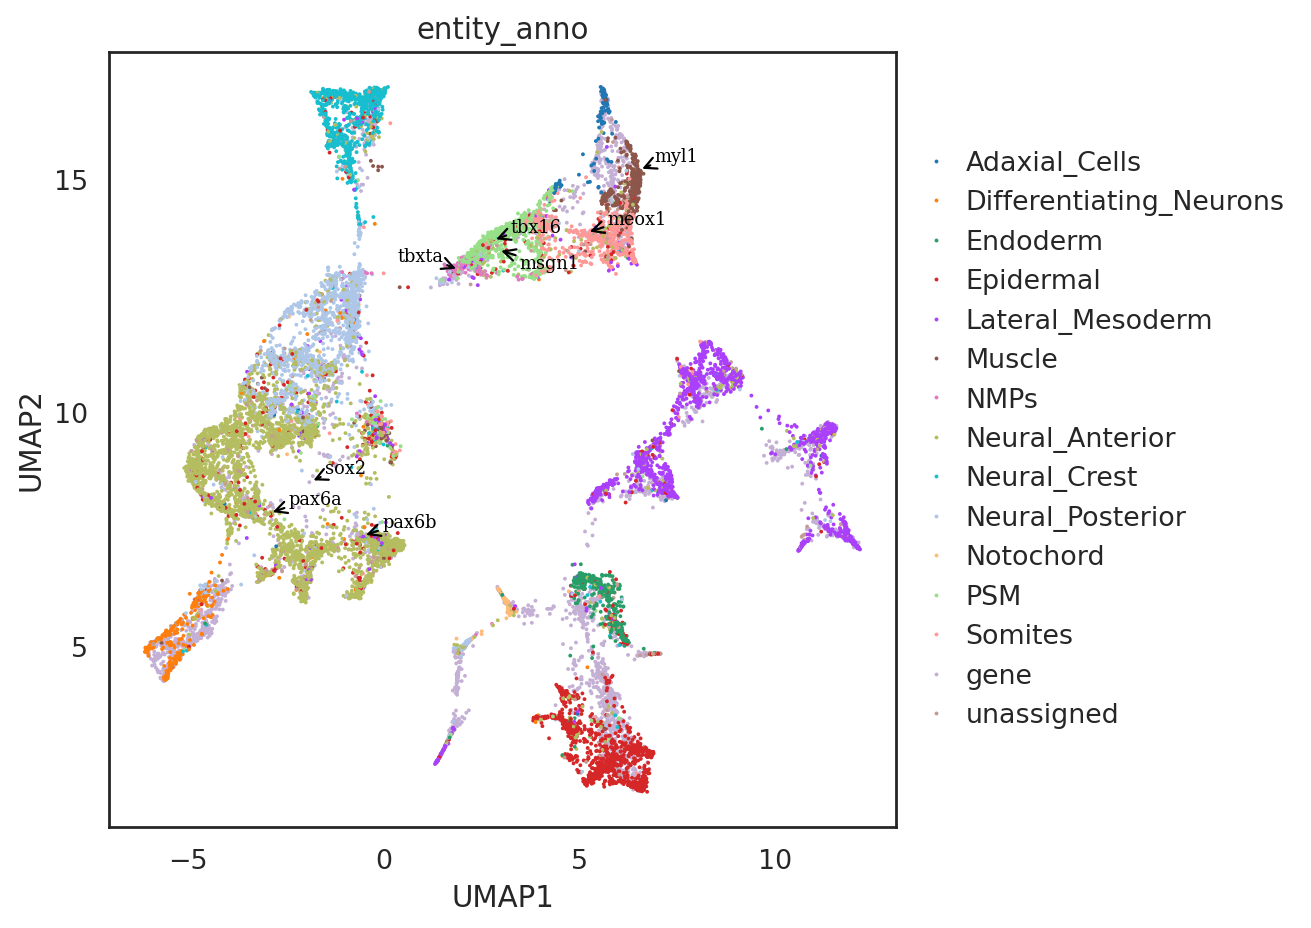

In [172]:
si.pl.umap(adata_all_selected[::-1,],
           color=['entity_anno'],
           #dict_palette={'entity_anno': palette_entity_anno},
           text_size=8,
           fig_size=(8,6),
           size=3,
           drawing_order='original',
           texts=marker_genes,
           #texts=marker_genes \
           #      + ['TF_Lef1','TF_Hoxc13'] \
           #      + ['Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)',
           #         'Peak1(Hoxc13)', 'Peak2(Hoxc13)'],
           text_expand=(2,1.5),
           show_texts=True)

## Step 8. save the adata objects

This is where we need some creativity - how can we save the object with all embeddings?

- First, adata_all should be the major object.
- Second, we will concatenate "0"s for other embeddings.



,celltype,id_dataset,entity_anno
pif1,NaN,query_0,gene
bicc1a,NaN,query_0,gene
vwa2,NaN,query_0,gene
bmp16,NaN,query_0,gene
ccl25b,NaN,query_0,gene


In [180]:
adata_P

AnnData object with n_obs × n_vars = 248320 × 50
    layers: 'softmax'

In [ ]:
# adata_CG.write(os.path.join(workdir,'adata_CG.h5ad'))
# adata_CP.write(os.path.join(workdir,'adata_CP.h5ad'))

adata_C.write(os.path.join(workdir,'adata_C.h5ad'))
adata_G.write(os.path.join(workdir,'adata_G.h5ad'))
adata_P.write(os.path.join(workdir,'adata_P.h5ad'))

adata_all_CG.write(os.path.join(workdir,'adata_all_CG.h5ad'))
adata_all.write(os.path.join(workdir,'adata_all.h5ad'))
adata_all_selected.write(os.path.join(workdir,'adata_all_selected.h5ad'))

adata_cmp_CG.write(os.path.join(workdir,'adata_cmp_CG.h5ad'))
adata_cmp_CP.write(os.path.join(workdir,'adata_cmp_CP.h5ad'))

In [191]:
adata_all.obsm["X_umap"]

array([[-5.339795 , -2.8018823],
       [-1.2943472, -4.756415 ],
       [ 3.082961 , -1.5511141],
       ...,
       [ 0.6766863,  0.6265139],
       [-0.4490059,  7.172708 ],
       [ 6.9376016,  4.1495633]], dtype=float32)

In [195]:
df_umap_features = pd.DataFrame(index=adata_C.obs_names,
                                data=adata_C.obsm["X_umap"])

df_umap_features

,0,1
GGTTGAGCAGGTATTT-1,9.649376,-0.973638
TGTCAATCATGAAATG-1,12.664702,5.454842
CCATATTTCTTGGACG-1,4.582353,-5.283343
CAAACAACAAGCTAAA-1,-2.849512,0.520217
CAGGTCCAGGTCCACA-1,0.832015,5.340625
...,...,...
CCACTTGGTAGCTGCG-1,5.111465,5.941409
GAACTTATCTTAGTGA-1,9.483417,12.017977
TCGTTAGCACTGACCG-1,9.203169,9.881030
CGTAGCGGTTAAGCTG-1,10.117153,-0.841708


In [211]:
# Re-format the UMAPs from each combination of feature sets for adata_all (cells+genes+peaks)
def reformat_umaps(adata, adata_all, embedding_key):
# adata: adata with specific features
# adata_all: the main adata object where we will add the reformatted embeddings
# embedding_key: key to be added in the main adata_all object's obsm slot

    df_umap_features = pd.DataFrame(data=adata.obsm["X_umap"],
                                    index=adata.obs_names,
                                    columns=["UMAP1","UMAP2"])

    df_umap_all = pd.DataFrame(data = np.full((adata_all.n_obs, 2), -10), #data=np.zeros((adata_all.n_obs, 2)),
                               index=adata_all.obs_names,
                               columns=["UMAP1","UMAP2"])

    # mapping the df_umap_features' (x,y) coordinates to df_umap_all for matching entries (df.map?)
    # Update the UMAP coordinates for the entries that are present in both dataframes
    df_umap_all.update(df_umap_features)
    df_umap_all
    # Now df_umap_all contains the UMAP coordinates for cells from adata_C and (0,0) for genes and peaks

    # To store this back into the AnnData object:
    adata_all.obsm[embedding_key] = df_umap_all.values
    
    return adata_all

In [212]:
adata_all_copied = reformat_umaps(adata_C, adata_all, "X_umap_cells")
adata_all_copied = reformat_umaps(adata_all_CG, adata_all, "X_umap_cells_genes")
adata_all_copied = reformat_umaps(adata_all_selected, adata_all, "X_umap_cells_genes_selected")
adata_all_copied

AnnData object with n_obs × n_vars = 287614 × 50
    obs: 'celltype', 'id_dataset', 'entity_anno'
    uns: 'entity_anno_colors'
    obsm: 'X_umap', 'X_umap_cells', 'X_umap_cells_genes', 'X_umap_cells_genes_selected'

In [213]:
adata_all_copied.write_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/TDR119_cicero_output/TDR119_simba_cells_genes_peaks_embeddings_v2.h5ad")

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


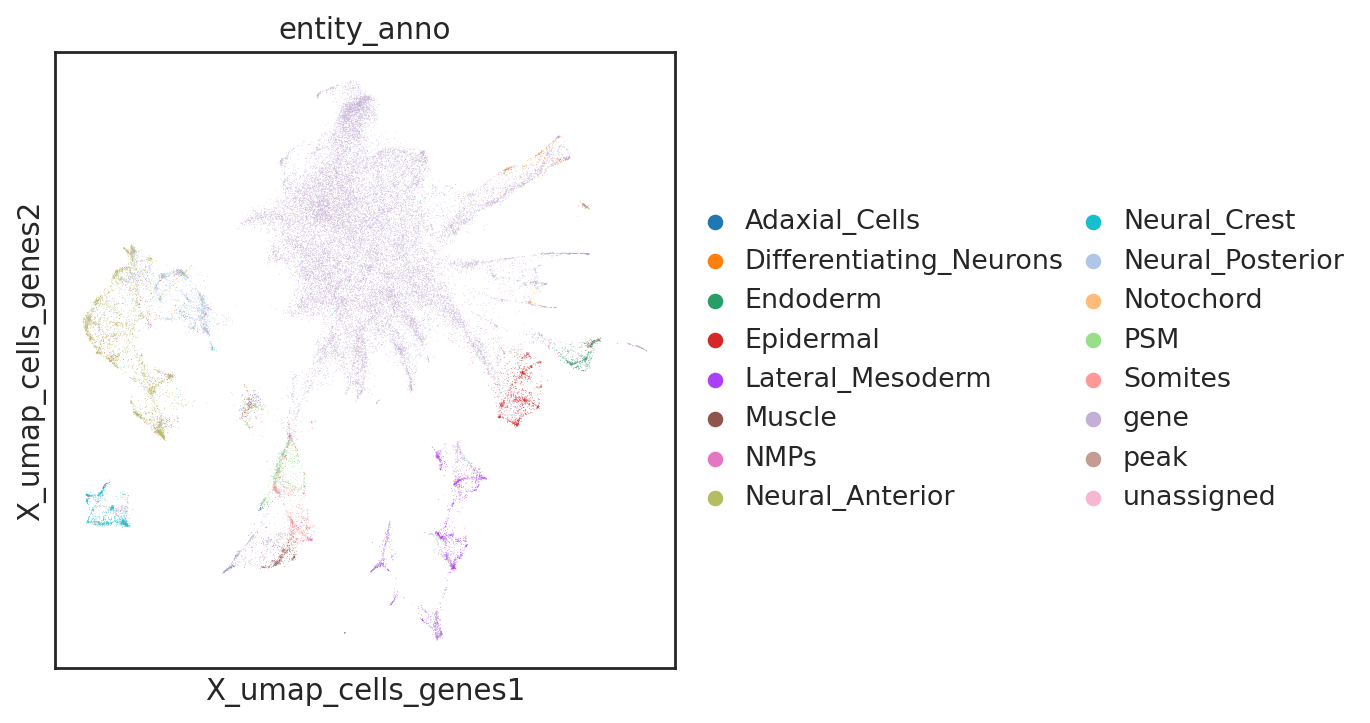

In [201]:
sc.pl.embedding(adata_all_copied, basis="X_umap_cells_genes", color="entity_anno")

# DEPRECATED

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


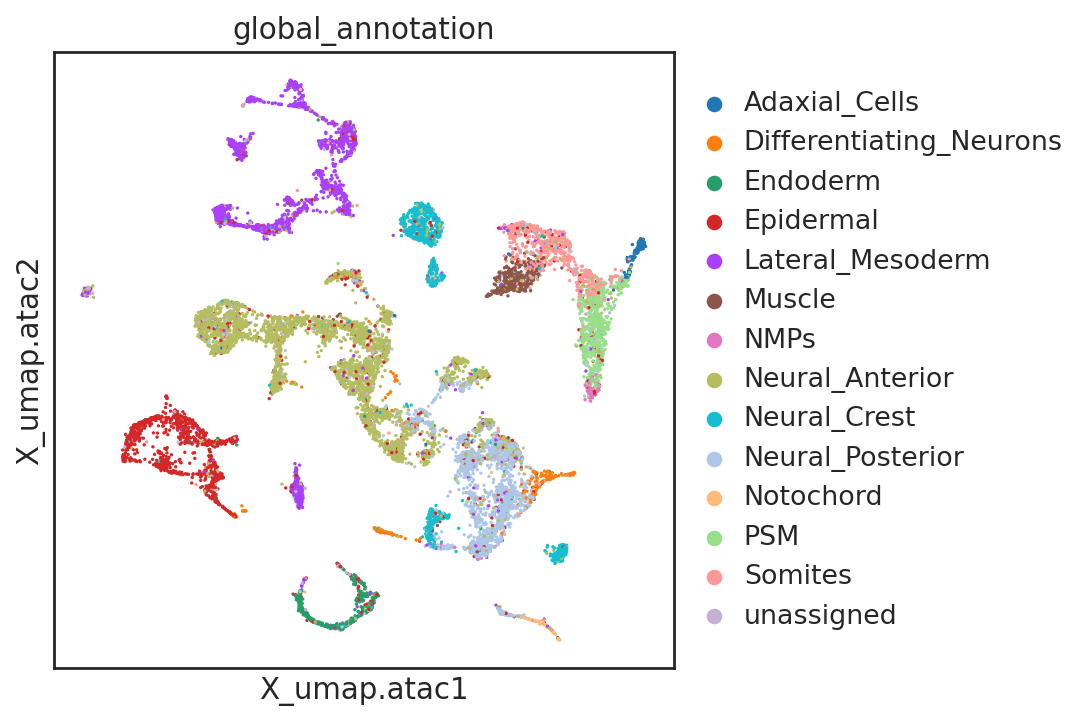

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


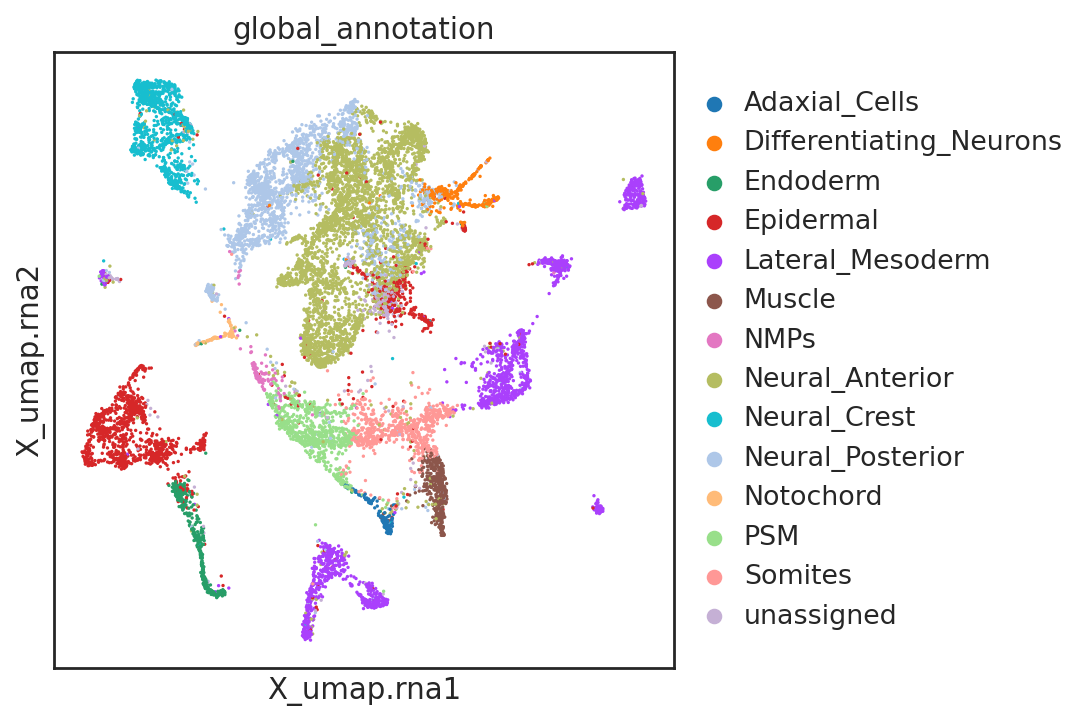

/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/yang-joon.kim/.conda/envs/env_simba/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


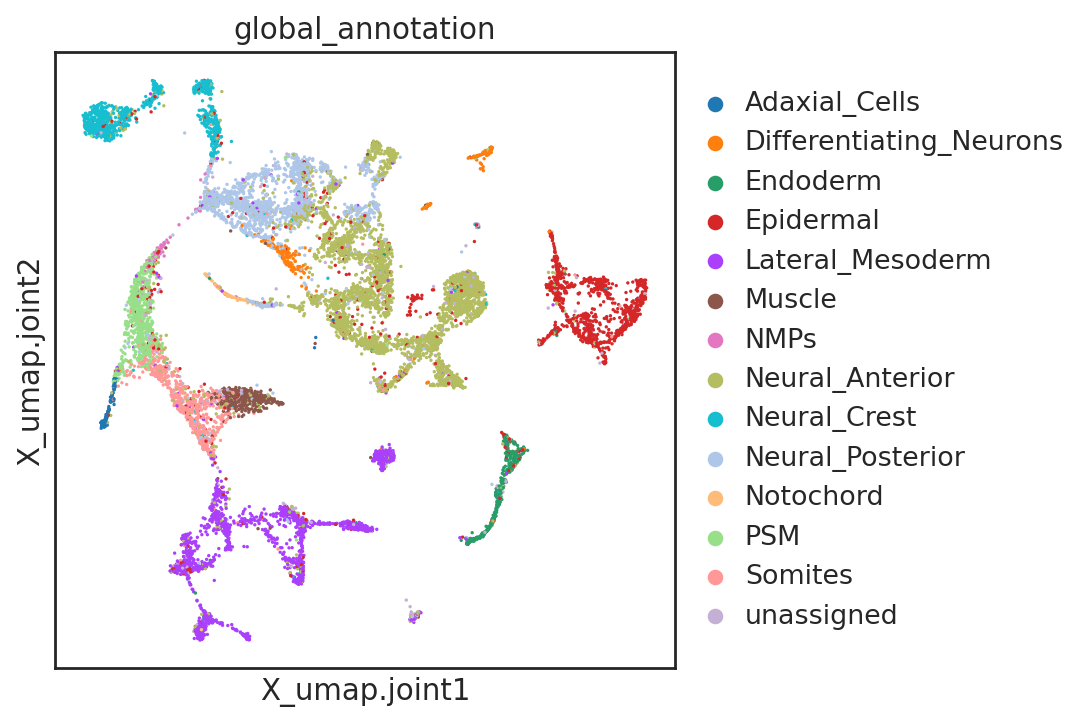

In [49]:
# Check the multiome embeddings (RNA, ATAC, and joint)
sc.pl.embedding(adata_rna, 
                basis="X_umap.atac",
                color="global_annotation")

sc.pl.embedding(adata_rna, 
                basis="X_umap.rna",
                color="global_annotation")

sc.pl.embedding(adata_rna, 
                basis="X_umap.joint",
                color="global_annotation")